In [1]:
#Importing required packages

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#Visualization Packages

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Deep Learning Packages

from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.python import metrics
from tensorflow.keras.utils import plot_model



In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)



In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [7]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 59ms/step - loss: 0.1649 - accuracy: 0.7693 - val_loss: 0.1097 - val_accuracy: 0.8664
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0872 - accuracy: 0.8915 - val_loss: 0.0872 - val_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0639 - accuracy: 0.9192 - val_loss: 0.0839 - val_accuracy: 0.8854
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0489 - accuracy: 0.9388 - val_loss: 0.0863 - val_accuracy: 0.8839
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0401 - accuracy: 0.9513 - val_loss: 0.0932 - val_accuracy: 0.8762
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0340 - accuracy: 0.9597 - val_loss: 0.0962 - val_accuracy: 0.8759
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0278 - accuracy: 0.9682 - val_loss: 0.0967 - val_accuracy: 0.8769
Epoch 8/20
30

In [14]:
history_dict_1 = history.history
history_dict_1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

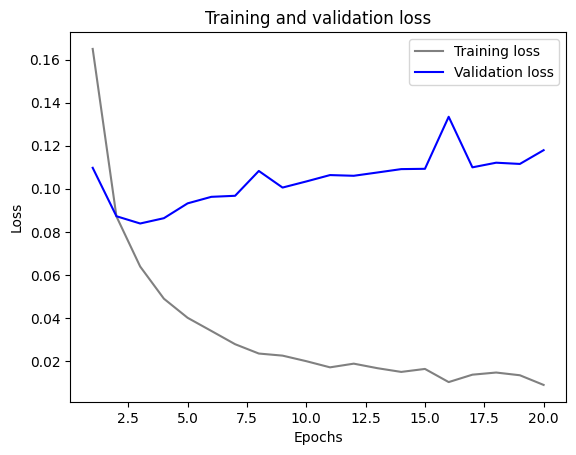

In [15]:
import matplotlib.pyplot as plt
history_dict_1 = history.history
loss_values = history_dict_1["loss"]
val_loss_values = history_dict_1["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "grey", label="Training loss")
plt.plot(epochs, val_loss_values, "blue", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

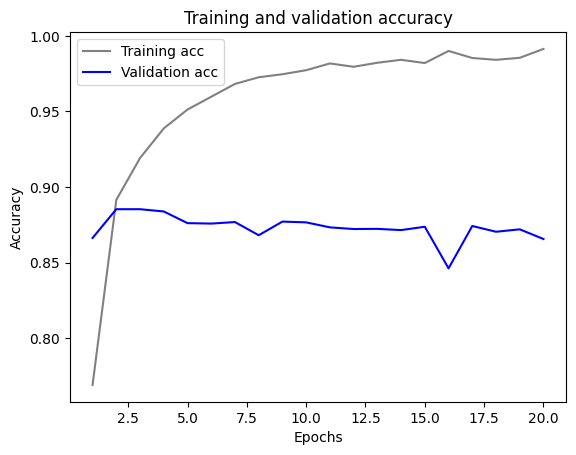

In [16]:
plt.clf()
acc = history_dict_1["accuracy"]
val_acc = history_dict_1["val_accuracy"]
plt.plot(epochs, acc, "grey", label="Training acc")
plt.plot(epochs, val_acc, "blue", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 15ms/step - loss: 0.1381 - accuracy: 0.8134
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.0739 - accuracy: 0.9036
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.0597 - accuracy: 0.9232
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.0903 - accuracy: 0.8818


In [18]:
results

[0.09148842096328735, 0.8804399967193604]

In [19]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.05463035],
       [0.9976006 ],
       [0.840027  ],
       ...,
       [0.15193418],
       [0.04029947],
       [0.70021635]], dtype=float32)

In [20]:
model_1 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_1.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


history_1 = model_1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.1717 - accuracy: 0.7770 - val_loss: 0.1278 - val_accuracy: 0.8420
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0962 - accuracy: 0.8893 - val_loss: 0.0956 - val_accuracy: 0.8761
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0702 - accuracy: 0.9161 - val_loss: 0.0899 - val_accuracy: 0.8792
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0568 - accuracy: 0.9317 - val_loss: 0.0824 - val_accuracy: 0.8897
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0458 - accuracy: 0.9455 - val_loss: 0.0869 - val_accuracy: 0.8810
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0373 - accuracy: 0.9571 - val_loss: 0.0862 - val_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0339 - accuracy: 0.9609 - val_loss: 0.0891 - val_accuracy: 0.8802
Epoch 8/20
30

In [21]:
history_dict_2 = history_1.history
history_dict_2.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

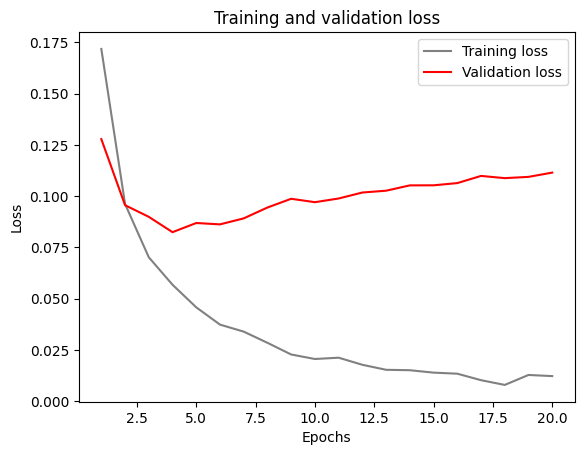

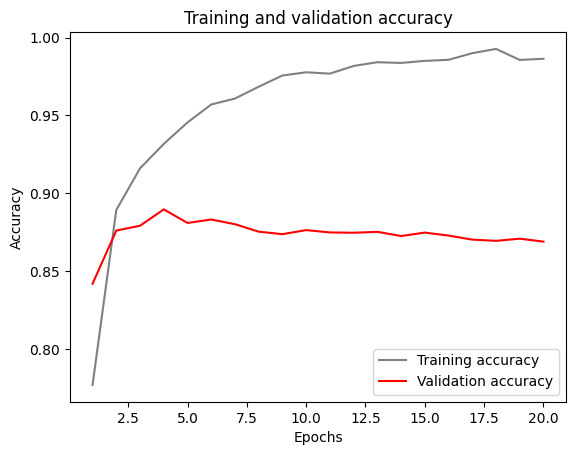

In [22]:
import matplotlib.pyplot as plt
history_dict_2 = history_1.history
loss_values = history_dict_2["loss"]
val_loss_values = history_dict_2["val_loss"]
epochs = range(1, len(loss_values) + 1)
#Plotting graph between Training and Validation loss
plt.plot(epochs, loss_values, "grey", label="Training loss")
plt.plot(epochs, val_loss_values, "red", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plotting graph between Training and Validation Accuracy
plt.clf()
acc = history_dict_2["accuracy"]
val_acc = history_dict_2["val_accuracy"]
plt.plot(epochs, acc, "grey", label="Training accuracy")
plt.plot(epochs, val_acc, "red", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [30]:
np.random.seed(111)
model_1 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_1.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model_1.fit(x_train, y_train, epochs=5, batch_size=512)
results_1 = model_1.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 1s 13ms/step - loss: 0.1466 - accuracy: 0.8141
Epoch 2/5
49/49 [==============================] - 1s 17ms/step - loss: 0.0791 - accuracy: 0.9008
Epoch 3/5
49/49 [==============================] - 1s 17ms/step - loss: 0.0609 - accuracy: 0.9231
Epoch 4/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0526 - accuracy: 0.9337
Epoch 5/5
782/782 [==============================] - 1s 1ms/step - loss: 0.0957 - accuracy: 0.8738


In [18]:
results_1

[0.09259252995252609, 0.8767200112342834]

In [31]:
model_1.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.03866682],
       [0.999194  ],
       [0.7924226 ],
       ...,
       [0.08738354],
       [0.02610279],
       [0.63774586]], dtype=float32)

In [ ]:
np.random.seed(222)
model_2 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_2.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history_2 = model_2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [13]:
history_dict_3 = history_2.history
history_dict_3.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

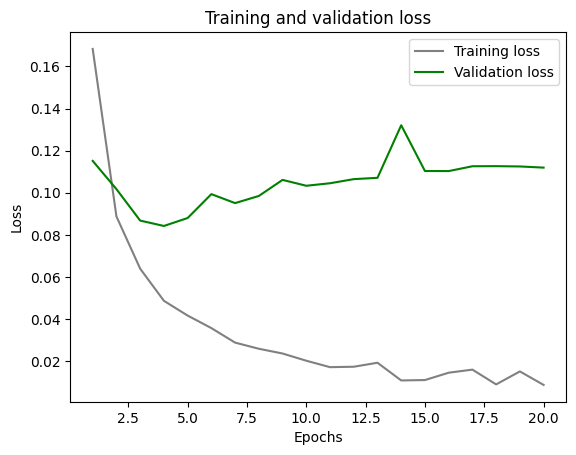

In [14]:
loss_values = history_dict_3["loss"]
val_loss_values = history_dict_3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "grey", label="Training loss")
plt.plot(epochs, val_loss_values, "green", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

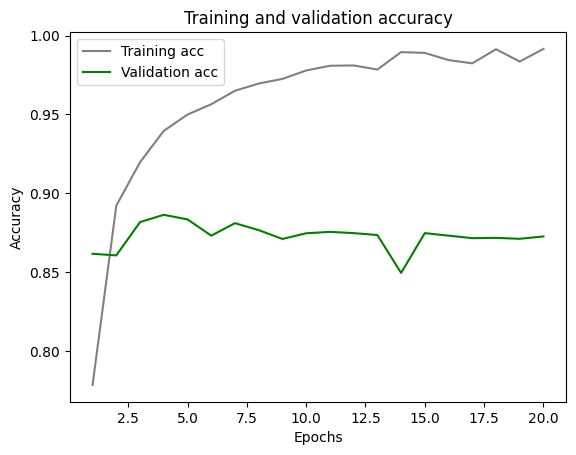

In [15]:
plt.clf()
acc = history_dict_3["accuracy"]
val_acc = history_dict_3["val_accuracy"]
plt.plot(epochs, acc, "grey", label="Training acc")
plt.plot(epochs, val_acc, "green", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [7]:
np.random.seed(333)
model_3 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])


model_3.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model_3.fit(x_train, y_train, epochs=3, batch_size=512)
results_3 = model_3.evaluate(x_test, y_test)


Epoch 1/3
49/49 [==============================] - 2s 17ms/step - loss: 0.1483 - accuracy: 0.8106
Epoch 2/3
49/49 [==============================] - 1s 16ms/step - loss: 0.0765 - accuracy: 0.9014
Epoch 3/3
782/782 [==============================] - 1s 1ms/step - loss: 0.0869 - accuracy: 0.8833


In [8]:
results_3

[0.08689894527196884, 0.8833199739456177]

In [9]:
model_3.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.09682493],
       [0.99060297],
       [0.9412493 ],
       ...,
       [0.08179896],
       [0.0655608 ],
       [0.7950641 ]], dtype=float32)

In [32]:
np.random.seed(444)
model_32 = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
#compiling the model
model_32.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validating the model
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#Model fit
np.random.seed(444)
history_32 = model_32.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.1594 - accuracy: 0.7735 - val_loss: 0.1258 - val_accuracy: 0.8283
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0876 - accuracy: 0.8874 - val_loss: 0.1013 - val_accuracy: 0.8623
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0644 - accuracy: 0.9188 - val_loss: 0.0930 - val_accuracy: 0.8749
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0549 - accuracy: 0.9310 - val_loss: 0.0886 - val_accuracy: 0.8793
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0450 - accuracy: 0.9446 - val_loss: 0.0992 - val_accuracy: 0.8681
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0398 - accuracy: 0.9501 - val_loss: 0.0911 - val_accuracy: 0.8778
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0349 - accuracy: 0.9581 - val_loss: 0.0912 - val_accuracy: 0.8790
Epoch 8/20
30

In [33]:
history_dict_32 = history_32.history
history_dict_32.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

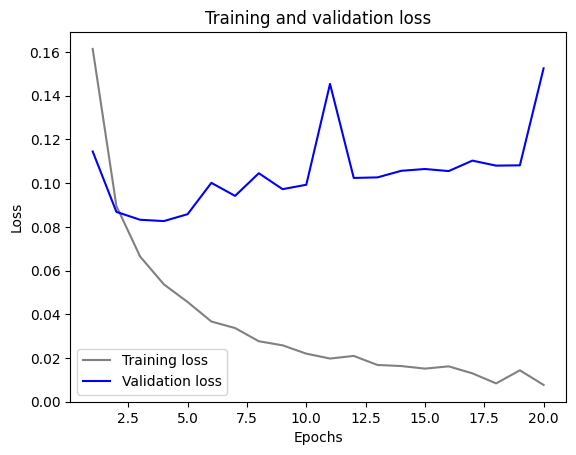

In [12]:
loss_values = history_dict_32["loss"]
val_loss_values = history_dict_32["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "grey", label="Training loss")
plt.plot(epochs, val_loss_values, "blue", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

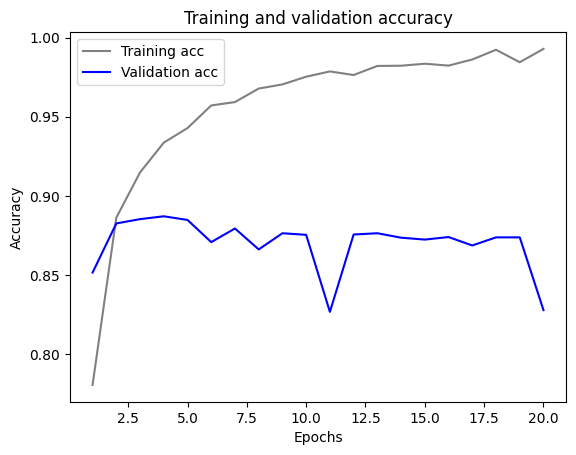

In [13]:
plt.clf()
acc = history_dict_32["accuracy"]
val_acc = history_dict_32["val_accuracy"]
plt.plot(epochs, acc, "grey", label="Training acc")
plt.plot(epochs, val_acc, "blue", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [34]:
history_32 = model_32.fit(x_train, y_train, epochs=3, batch_size=512)
results_32 = model_32.evaluate(x_test, y_test)
results_32

Epoch 1/3
49/49 [==============================] - 1s 16ms/step - loss: 0.0555 - accuracy: 0.9359
Epoch 2/3
49/49 [==============================] - 1s 16ms/step - loss: 0.0438 - accuracy: 0.9495
Epoch 3/3
782/782 [==============================] - 1s 2ms/step - loss: 0.1124 - accuracy: 0.8659


[0.11240310221910477, 0.865880012512207]

In [35]:
model_32.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[7.6968636e-04],
       [9.9999607e-01],
       [3.2178441e-01],
       ...,
       [4.6674330e-02],
       [2.4356099e-03],
       [9.7670722e-01]], dtype=float32)

In [15]:
np.random.seed(555)
model_64 = keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_64.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123)
history_64 = model_64.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 61ms/step - loss: 0.1667 - accuracy: 0.7558 - val_loss: 0.1031 - val_accuracy: 0.8699
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0909 - accuracy: 0.8816 - val_loss: 0.0941 - val_accuracy: 0.8706
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0693 - accuracy: 0.9104 - val_loss: 0.0823 - val_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0589 - accuracy: 0.9235 - val_loss: 0.0840 - val_accuracy: 0.8852
Epoch 5/20
30/30 [==============================] - 1s 49ms/step - loss: 0.0525 - accuracy: 0.9329 - val_loss: 0.0876 - val_accuracy: 0.8829
Epoch 6/20
30/30 [==============================] - 1s 44ms/step - loss: 0.0407 - accuracy: 0.9511 - val_loss: 0.0901 - val_accuracy: 0.8803
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0444 - accuracy: 0.9425 - val_loss: 0.1033 - val_accuracy: 0.8638
Epoch 8/20
30

In [37]:
history_dict_64 = history_64.history
history_dict_64.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

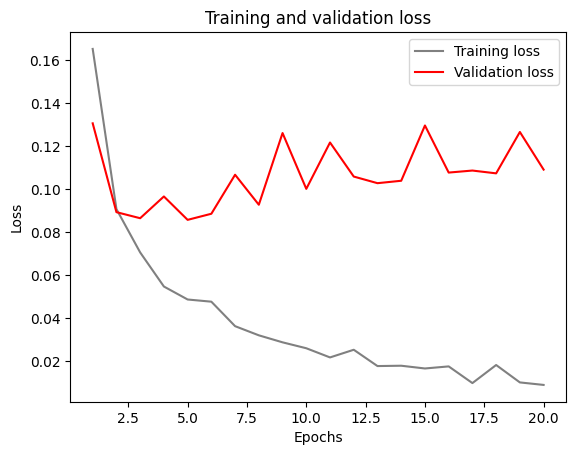

In [38]:
loss_values = history_dict_64["loss"]
val_loss_values = history_dict_64["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "grey", label="Training loss")
plt.plot(epochs, val_loss_values, "red", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

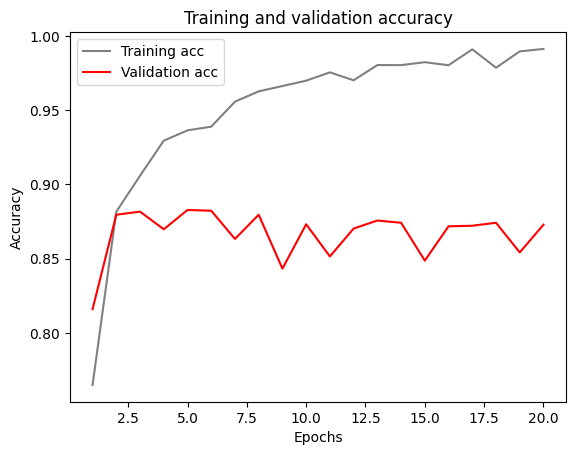

In [39]:
plt.clf()
acc = history_dict_64["accuracy"]
val_acc = history_dict_64["val_accuracy"]
plt.plot(epochs, acc, "grey", label="Training acc")
plt.plot(epochs, val_acc, "red", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [46]:
history_64 = model_64.fit(x_train, y_train, epochs=3, batch_size=512)
results_64 = model_64.evaluate(x_test, y_test)
results_64

Epoch 1/3
49/49 [==============================] - 1s 27ms/step - loss: 0.0536 - accuracy: 0.9374
Epoch 2/3
49/49 [==============================] - 2s 32ms/step - loss: 0.0435 - accuracy: 0.9502
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.1271 - accuracy: 0.8500


[0.12711021304130554, 0.8499600291252136]

In [16]:
model_64.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.01669381],
       [0.99999994],
       [0.99933356],
       ...,
       [0.04973997],
       [0.05992302],
       [0.99896365]], dtype=float32)

In [10]:
np.random.seed(666)
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
np.random.seed(666)
history_model_Dropout = model_Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.1844 - accuracy: 0.7446 - val_loss: 0.1288 - val_accuracy: 0.8548
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1186 - accuracy: 0.8675 - val_loss: 0.0959 - val_accuracy: 0.8822
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0894 - accuracy: 0.8992 - val_loss: 0.0895 - val_accuracy: 0.8803
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0739 - accuracy: 0.9145 - val_loss: 0.0822 - val_accuracy: 0.8876
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0626 - accuracy: 0.9274 - val_loss: 0.0871 - val_accuracy: 0.8811
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0545 - accuracy: 0.9377 - val_loss: 0.0880 - val_accuracy: 0.8818
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0469 - accuracy: 0.9471 - val_loss: 0.0868 - val_accuracy: 0.8844
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

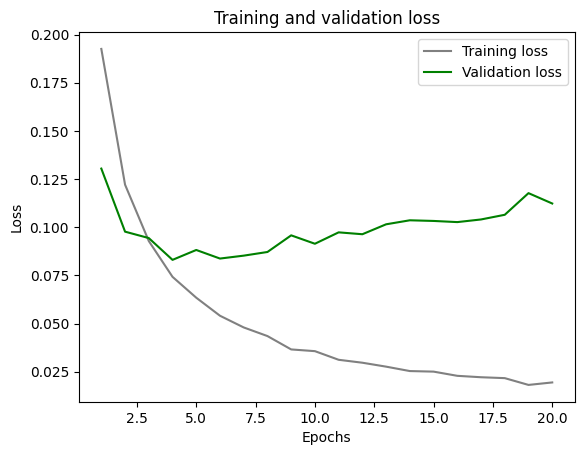

In [18]:
loss_values = history_dict_Dropout["loss"]
val_loss_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "grey", label="Training loss")
plt.plot(epochs, val_loss_values, "green", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

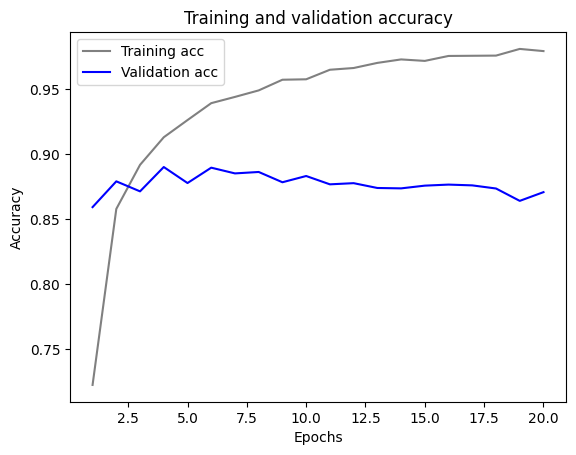

In [19]:
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "grey", label="Training acc")
plt.plot(epochs, val_acc, "blue", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [11]:
model_Dropout.fit(x_train, y_train, epochs=8, batch_size=512)
results_Dropout = model_Dropout.evaluate(x_test, y_test)
results_Dropout


Epoch 1/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0553 - accuracy: 0.9366
Epoch 2/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0483 - accuracy: 0.9438
Epoch 3/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0433 - accuracy: 0.9500
Epoch 4/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0410 - accuracy: 0.9528
Epoch 5/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0386 - accuracy: 0.9552
Epoch 6/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0365 - accuracy: 0.9585
Epoch 7/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0344 - accuracy: 0.9613
Epoch 8/8
782/782 [==============================] - 1s 1ms/step - loss: 0.1157 - accuracy: 0.8671


[0.1156952828168869, 0.8670799732208252]

In [9]:
np.random.seed(111)
model_Hyper = keras.Sequential([
    layers.Dense(32, activation="tanh",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="tanh",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="tanh",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
np.random.seed(123)
history_model_Hyper = model_Hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Hyper = history_model_Hyper.history
history_dict_Hyper.keys()

Epoch 1/20
30/30 [==============================] - 3s 52ms/step - loss: 0.2017 - accuracy: 0.7171 - val_loss: 0.1227 - val_accuracy: 0.8634
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1246 - accuracy: 0.8637 - val_loss: 0.1012 - val_accuracy: 0.8806
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0993 - accuracy: 0.8938 - val_loss: 0.1114 - val_accuracy: 0.8682
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0843 - accuracy: 0.9144 - val_loss: 0.0990 - val_accuracy: 0.8859
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0742 - accuracy: 0.9251 - val_loss: 0.1096 - val_accuracy: 0.8761
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0658 - accuracy: 0.9369 - val_loss: 0.1038 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0650 - accuracy: 0.9363 - val_loss: 0.1063 - val_accuracy: 0.8833
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

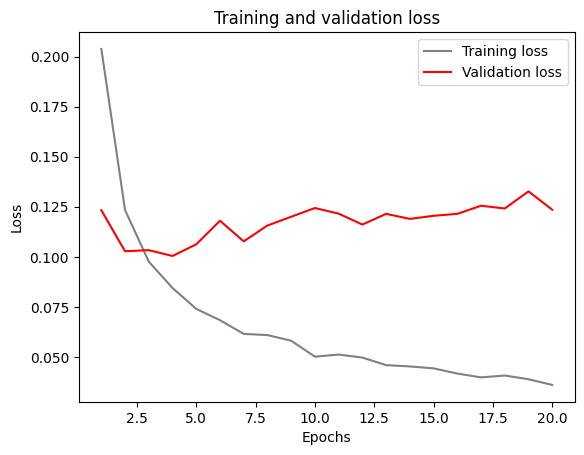

In [13]:
loss_values = history_dict_Hyper["loss"]
val_loss_values = history_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "grey", label="Training loss")
plt.plot(epochs, val_loss_values, "red", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

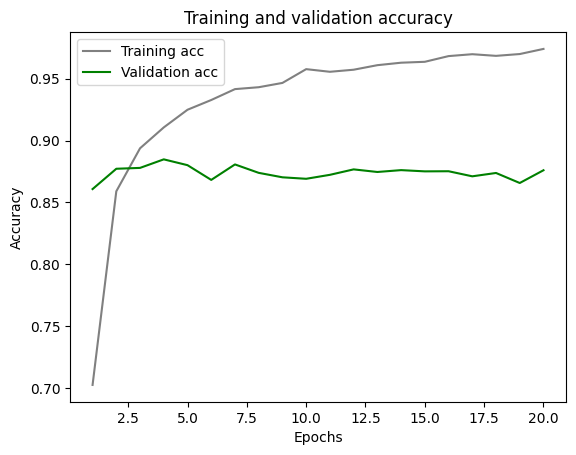

In [14]:
plt.clf()
acc = history_dict_Hyper["accuracy"]
val_acc = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "grey", label="Training acc")
plt.plot(epochs, val_acc, "green", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [10]:
model_Hyper.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hyper = model_Hyper.evaluate(x_test, y_test)
results_Hyper

Epoch 1/8
49/49 [==============================] - 1s 23ms/step - loss: 0.0719 - accuracy: 0.9318
Epoch 2/8
49/49 [==============================] - 1s 22ms/step - loss: 0.0640 - accuracy: 0.9404
Epoch 3/8
49/49 [==============================] - 1s 18ms/step - loss: 0.0626 - accuracy: 0.9414
Epoch 4/8
49/49 [==============================] - 1s 17ms/step - loss: 0.0599 - accuracy: 0.9435
Epoch 5/8
49/49 [==============================] - 1s 18ms/step - loss: 0.0556 - accuracy: 0.9501
Epoch 6/8
49/49 [==============================] - 1s 17ms/step - loss: 0.0532 - accuracy: 0.9529
Epoch 7/8
49/49 [==============================] - 1s 17ms/step - loss: 0.0523 - accuracy: 0.9538
Epoch 8/8
782/782 [==============================] - 1s 2ms/step - loss: 0.1273 - accuracy: 0.8660


[0.12725219130516052, 0.8659600019454956]

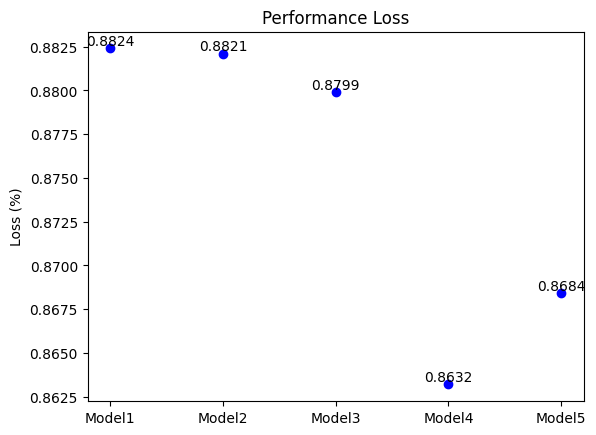

In [11]:
Models = ('Model1','Model2','Model3','Model4','Model5')
Loss = (0.8824,0.8821,0.8799,0.8632,0.8684)

plt.scatter(Models,Loss,color='blue')
plt.title('Performance Loss')
plt.ylabel('Loss (%)')

for (xi, yi) in zip(Models,Loss):
    plt.text(xi, yi, yi, va='bottom', ha='center')


plt.show()